
### 1. Data Collection
    a. Importing Libraries
    b. Loading the Dataset
### 2. Data Cleaning
    a. Checking the Dataset Shape
    b. Descriptive Statistics of Categorical Column
    c. Scatter Plot for Horsepower and MPG by Origin
    d. Unique Values in the "Cylinders" Column
    e. Scatter Plot for Horsepower and MPG by Cylinders
    f. Descriptive Statistics of MPG by Model Year
    g. Scatter Plots for Numerical Features vs. MPG
### 3. Exploratory Data Analysis
    a. Importing Libraries for Machine Learning
    b. Custom Transformer to Extract Company Name from "Name" Column
    c. Splitting the Data into Train and Test Sets
    d. Selecting Features for Data Preparation
    e. Data Pipelines for Data Preparation
    f. Transforming Training and Test Datasets
    g. Training Multiple Machine Learning Models
    h. Selecting the Best Model and Evaluating Performance
### 4. Hyperparameter Tuning
    a. Importing Libraries for Grid Search CV
    b. Defining Hyperparameter Grid
    c. Applying Grid Search CV on Random Forest Regressor
    d. Best Hyperparameters and Model Performance

In [1]:
#----------------- EDA Libraries-------------------------------------
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**EDA-exploratory data anaylsis** 

In [2]:
mpg = sns.load_dataset("mpg")
mpg.head() #checking the dataset .

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
#shape of our dataset . how many rows and columns are present . 
mpg.shape

(398, 9)

In [4]:
# `origin` is a categorical column we have only three categories in origin . 
mpg.groupby("origin")["mpg"].describe()

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
europe,70.0,27.891429,6.723930,16.2,24.0,26.5,30.65,44.3
japan,79.0,30.450633,6.090048,18.0,25.7,31.6,34.05,46.6
usa,249.0,20.083534,6.402892,9.0,15.0,18.5,24.00,39.0


<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

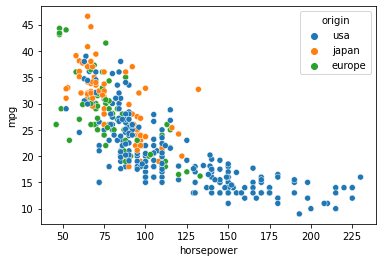

In [5]:
#seaborn is used in data visualization .we are making scatter plot between mpg and horsepower
#and checking how the data points are scatter on the basis of origin.
sns.scatterplot(data=mpg, x="horsepower", y="mpg", hue="origin") 

In [6]:
#cylinder is also a categorical column .it ranges from 3 to 8.
mpg["cylinders"].unique()

array([8, 4, 6, 3, 5], dtype=int64)

<span style='color:orange'>hue arguement is used to show the distribution of categories</span>

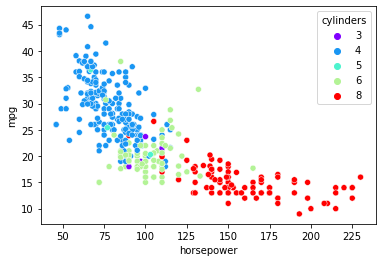

In [7]:
#we can how number of cylinders affecting the milage. 
sns.scatterplot(data=mpg, x="horsepower", y="mpg", hue="cylinders", palette="rainbow")
plt.show()

In [8]:
#we can do same for model year which is also a categorical column . 
mpg.groupby("model_year")["mpg"].describe()

,count,mean,std,min,25%,50%,75%,max
model_year,,,,,,,,
70,29.0,17.689655,5.339231,9.0,14.000,16.00,22.000,27.0
71,28.0,21.250000,6.591942,12.0,15.500,19.00,27.000,35.0
72,28.0,18.714286,5.435529,11.0,13.750,18.50,23.000,28.0
73,40.0,17.100000,4.700245,11.0,13.000,16.00,20.000,29.0
74,27.0,22.703704,6.420010,13.0,16.000,24.00,27.000,32.0
75,30.0,20.266667,4.940566,13.0,16.000,19.50,23.000,33.0
76,34.0,21.573529,5.889297,13.0,16.750,21.00,26.375,33.0
77,28.0,23.375000,6.675862,15.0,17.375,21.75,30.000,36.0
78,36.0,24.061111,6.898044,16.2,19.350,20.70,28.000,43.1


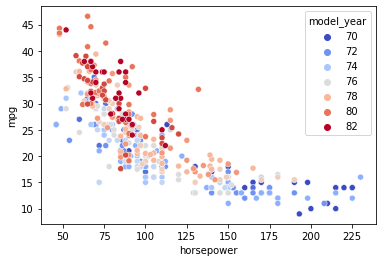

In [9]:
#distribution of model year 
sns.scatterplot(data=mpg, x="horsepower", y="mpg", hue="model_year", palette="coolwarm")
plt.show()

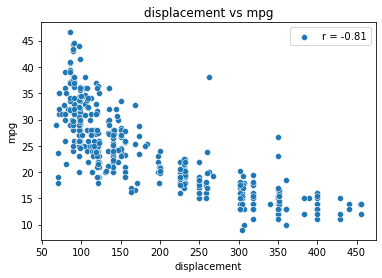

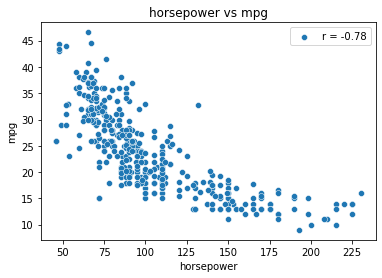

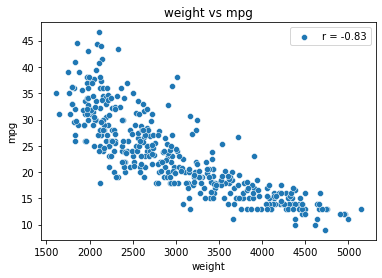

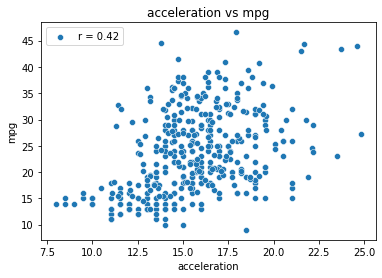

In [10]:
num_features = ["displacement", "horsepower", "weight", "acceleration"]

for X in num_features:
    plt.title(f"{X} vs mpg")
    r = round(np.corrcoef(mpg.dropna()[X], mpg.dropna()["mpg"])[0, 1], 2)
    sns.scatterplot(data=mpg, x=X, y="mpg", label=f"r = {r:0.2f}")
    plt.legend()
    plt.show()

In [11]:
#its time to build a machine learning model . first we import necessary libraries and classes
# sklearn or skicit learn is a very famous machine learning library used to build models.
#------------------- Transformers and Data Pipelines------------------
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline # sequential pipeline
from sklearn.compose import ColumnTransformer
#base classes of sklearn library . every classes inherits these classes. 
from sklearn.base import BaseEstimator, TransformerMixin 
#----------------------------------------------------------------------

#-----------------------Data Sampling----------------------------------
from sklearn.model_selection import train_test_split 

# this function divides the data into training and test set. (xtrain,xtest,ytrain,ytest)
#----------------------------------------------------------------------

#-----------------------Machine Learning Models------------------------
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor #stochastic gradient descent resgression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
#-----------------------------------------------------------------------

#-----------------------Evaluation Metrices------------------------------
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

def rmse(y, y_hat): #root of mean squared error
    mse = mean_squared_error(y, y_hat)
    return np.sqrt(mse)

<span style="color:red">__transformer__</span> - transformers converts the data into required type . like it can fill the missing values (simple imputer) or can we make our custom tranform to add additional columns as per our requirements.
every tranformer,estimator has these three methods :-
`fit` - which is used in training it learn the value of coefficent
`tranform`- it tranforms the data . 
`fit_tranform` - we can do above steps simultenouly . it can only be applied on training data .do not apply on test data.

In [12]:
#making our custom tranformer to process the name column and extract the company name from the column . thus making it a 
# categorical column which is easy to encode we will encode this column using ordinal encoder as this column has more than 20
# categories so one hot can't be applied . then we will scaled the data. to match the scaling of all features. 


#---------------------Custom Transformer-----------------------------------
class FeatureAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.in_column = "name"
    def fit(self, X, y=None):
        # X -> Data Frame 
        return self  
    def transform(self, X, y=None):
        X[self.in_column] = X[self.in_column].str.split(" ", expand=True)[0] #first column is name of company
        return X
    def fit_transform(self, X, y=None):
        self.fit(X, y) # parameter 
        return self.transform(X, y) # act to transform
#-------------------------------------------------------------------------------  



In [13]:
#------------------------------Load and Sample Data Into Train and Test Datasets----------------------------

mpg = sns.load_dataset("mpg")
X = mpg.drop("mpg", axis=1) # features
y = mpg["mpg"] # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.08, random_state=131)
# sampling
#------------------------------------------------------------------------------------------------------------

#-------------------------------Feature Selection for Data Prepration or Data Modeling for ML Model-----------
num_features = ["displacement", "horsepower", "weight", "acceleration"] # num_pipeline
nominal_columns = ["origin"] # 1 column --> OneHotEncoder  # -> 3 columns
ordinal_columns = ["name", "model_year", "cylinders"] # 
#pass_through_columns = ["cylinders"]
#drop_columns = ["model_year"]
#--------------------------------------------------------------------------------------------------------------

#------------------------------Data Pipelines to get data ready for ML Model------------------------------------

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),# T1
    #("scaler", StandardScaler())# T2
]) # 4 columns --> T1 -> T2 --> 4 columns 

cat_pipeline = Pipeline([
    ("feature adder", FeatureAdder()), # T1
    ("ordinal encoder", OrdinalEncoder()) # T2
]) # 1 column -> T1 -> T2 -> 1 column


pipeline = ColumnTransformer([
    ("num pipeline", num_pipeline, num_features), # 4 column "displacement", "horsepower", "weight", "acceleration" 
    ("nominal transformer", OneHotEncoder(), nominal_columns), # 3 column  "europe", "japan", "usa"
    ("ordinal transformer", cat_pipeline, ordinal_columns), # 1 column -> "company name", "model year"
    #("dont' change", "passthrough", pass_through_columns), # 1 column -> "cylinders"
    #("drop columns", "drop", drop_columns) # ?
])
#-------------------------------------------------------------------------------------------------------------------

#-----------------------Transforming Training and Test Datasets using Data Pipelines---------------------------------
X_train_tr = pipeline.fit_transform(X_train)
X_test_tr = pipeline.transform(X_test)

scaler = StandardScaler()
X_train_tr = scaler.fit_transform(X_train_tr)
X_test_tr = scaler.transform(X_test_tr)
#---------------------------------------------------------------------------------------------------------------------


In [14]:
#-----------------------Selecting Various ML Models to Train----------------------------------------------------------
models = [LinearRegression(), SGDRegressor(), DecisionTreeRegressor(), SVR(), RandomForestRegressor()]

#-----------------------Function to Dry run various Estimators (ML Models) for Model Selection---------
def train_ml_models(models, X_train_tr, X_test_tr, y_train, y_test):
    result = {"Model Name": [], "Train Accuracy": [], "Test Accuracy": [],
             "Train Error": [], "Test Error": []}
    
    title = "|{:^30}|{:^18}|{:^18}|{:^18}|{:^18}|"
    width = 108
    # model name  train accuracy     test accuracy    train error   test error 
    print("_"*width)
    print(title.format("Model Name", "Train Accuracy %", "Test Accuracy %", "Train Error", "Test Error"))
    print("_"*width)
    for model in models:
        model.fit(X_train_tr, y_train)
        y_hat_train = model.predict(X_train_tr)
        y_hat_test = model.predict(X_test_tr)
        tr_acc = round(r2_score(y_train, y_hat_train)*100, 2)
        ts_acc = round(r2_score(y_test, y_hat_test)*100, 2)
        tr_err = round(rmse(y_train, y_hat_train), 2)
        ts_err = round(rmse(y_test, y_hat_test), 2)
        result["Model Name"].append(model)
        result["Train Accuracy"].append(tr_acc)
        result["Test Accuracy"].append(ts_acc)
        result["Train Error"].append(tr_err)
        result["Test Error"].append(ts_err)
        print(title.format(str(model), tr_acc, ts_acc, tr_err, ts_err))
        print("-"*width)
    return pd.DataFrame(result)
#---------------------------------------------------------------------------------------------------------


In [15]:
#-----------------------Selection Good Fit Model out of All Models-----------------------------------------------------
result = train_ml_models(models, X_train_tr, X_test_tr, y_train, y_test)

____________________________________________________________________________________________________________
|          Model Name          | Train Accuracy % | Test Accuracy %  |   Train Error    |    Test Error    |
____________________________________________________________________________________________________________
|      LinearRegression()      |      82.61       |      85.93       |       3.24       |       3.03       |
------------------------------------------------------------------------------------------------------------
|        SGDRegressor()        |      82.19       |      84.65       |       3.28       |       3.17       |
------------------------------------------------------------------------------------------------------------
|   DecisionTreeRegressor()    |      100.0       |      61.47       |       0.0        |       5.02       |
------------------------------------------------------------------------------------------------------------
|            SVR() 

In [16]:
#test our model on real data.

real_data = pd.DataFrame({
    "cylinders": [ 4, 8, 6],
    "displacement": [200, 250, 300],
    "horsepower": [120, 150, 170],
    "weight": [2700, 1500, 3500],
    "acceleration": [10, 12, 15],
    "model_year": [80, 82, 70],
    "origin": ["usa", "japan", "europe"],
    "name": ["amc", "ford", "vw"]
})

In [17]:
# transforming the real data into tranformed data(scaled,imputed etc)
tr_data = pipeline.transform(real_data)
scaler = StandardScaler()
tr_data = scaler.fit_transform(tr_data)
#making object of linear regression . 
lin_model = LinearRegression()
#learning the best fit values of coef_ and intercept_ using training data. Xtrain and y train. 
lin_model.fit(X_train_tr,y_train)


LinearRegression()

In [18]:
#predicting the y or milage for the real data . 
lin_model.predict(tr_data)

array([20.94614621, 32.29582354, 17.00147288])

# Hyper parameter tunining

In [19]:
#Grid search cv is the class in sklearn which which is used in hyperparameter tunning
from sklearn.model_selection import GridSearchCV
# we will give different parameter values and gridsearchcv will find best parameter.
param_grid = [
    {
        "max_depth": [1, 3, 5, 7, 9],
        "max_features": [2, 4, 6, 8],
        "n_estimators": [10, 20, 40, 60, 90, 140, 200, 250]
    
    }
]

random_forest = RandomForestRegressor()

grid_search = GridSearchCV(random_forest, param_grid, scoring="neg_mean_squared_error")

grid_search.fit(X_train_tr, y_train)
grid_search.best_params_

{'max_depth': 9, 'max_features': 6, 'n_estimators': 20}

In [20]:
grid_search.best_score_

-8.398390319312758

In [21]:
# this will random forest regression model with best hyper parameters. 
best_model = grid_search.best_estimator_

In [22]:
# we will now predict the y hat /target using best model on X train data.
y_hat_train = grid_search.predict(X_train_tr)

#lets check the training accuracy and rmse of best random forest regressor
print("r2 score",r2_score(y_train, y_hat_train)) #r2 score for Train accuracy
print("rmse",rmse(y_train,y_hat_train))# train error

r2 score 0.9734076923835404
rmse 1.2676138147528995


In [23]:
#predicting y_hat_test/target using X_test_tr data. 
y_hat_test = best_model.predict(X_test_tr)
print("r2 score",r2_score(y_test,y_hat_test)) # r2 score /Test accuracy
print("rmse",rmse(y_test, y_hat_test)) # rmse / test error

r2 score 0.8538065577343065
rmse 3.0910288853780363
